# Preproccessing
### !The following code shows how I've transformed .wav files to .csv files. You don't need to run the scripts since they have already been run and the output has been stored in the data folder!

We have succesfully stored lists of samples in a waveform file format. What we need to do now is a feature extraction known as MFCC (Mel-Frequency Cepstral Coefficients). These features are extremely important for understanding crucial characteristics of the sound. <a href="https://www.sciencedirect.com/topics/computer-science/mel-frequency-cepstral-coefficient#:~:text=The%20Mel%2Dfrequency%20cepstral%20coefficients,characteristics%20of%20the%20human%20voice.">More about MFCCs here</a>.

We will iterate through each sound folder, get each waveform file, extract its MFCCs and then store the resulting csv.


In [75]:
import os
import librosa
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### MFCC Extraction

We will load the audio file and extract the MFCCs using a library called *<a href="https://librosa.org/doc/latest/index.html">librosa</a>*. We will select n=13 features for each audio source.

In [70]:
def extract_MFCC(dirpath, filenames, pad=0, n_mfcc=13):
    print(f"Current Directory: {dirpath}")
    print(f"Files: {filenames}")

    # iterate through all the files
    concated_arr = None
    for file in filenames:
        file_location = dirpath + "\\" + file
        
        # load the audio file
        signal, sr = librosa.load(file_location) # we get back the signal and the sample rate
        n_fft = min(len(signal), 2048)  # Ensure n_fft is no larger than the signal length
        # extract the mfccs
        mfccs = librosa.feature.mfcc(y=signal, n_mfcc=n_mfcc, sr=sr, n_fft=n_fft, hop_length=256, fmax=sr/2, n_mels=40)
        mfccs = mfccs.T
        mfccs = mfccs.reshape((1, -1))

        # pad the array
        pad_length = pad - mfccs.shape[1]
        # if the array is already long enough, no padding is added
        if pad_length > 0:
            # Pad only to the right
            mfccs = np.pad(mfccs, ((0, 0), (0, pad_length)), mode='constant', constant_values=0)

        # add the new data input to the concated array
        if concated_arr is None:
            concated_arr = mfccs
        else:
            concated_arr = np.concatenate((concated_arr, mfccs))

    return concated_arr

### We get each sound folder and apply the MFCC extraction function

**Important note:** Our data doesn't have the same shape. Some samples may be 1 second long, when others 0.5 seconds long. However we want them to have the same shape. For that reason we apply a padding at the end of each sample (if needed) ensuring uniformed entries. After some testing we found out that the biggest samples are all **1131 frames long**, so to every other sample that might be shorter we add the needed padding to reach 1131 frames as well.

In [71]:
raw_data_dir = "./raw_data"
data_dir = "./data"
#print(f"Data Dir Contents: {os.listdir(raw_data_dir)}\n")

resulting_arrays = []

for dirpath, dirnames, filenames in os.walk(raw_data_dir):
    # make sure we are not just in the raw_data_dir, rather the subdirectories of raw_data_dir
    if (len(dirnames) == 0):
        result = extract_MFCC(dirpath, filenames, pad=1131, n_mfcc=13) # WARNING! pad should be multiplicative of n_mfcc so we can reshape later
        print("Resulting array:", result.shape, "\n")

        # select subdir to save the file (e.g. if dirpath=./raw_data\clap and save_result=./data then save result on a subfolder ./data\clap)
        save_subdir = data_dir + "\\" + dirpath[11:] # dirpath=./raw_data\{subdir} - keep only the {subdir} name

        # create tuple subdir-result to know where to save
        tup = (save_subdir, result)

        resulting_arrays.append(tup)

Current Directory: ./raw_data\clap
Files: ['01_Clap_02_185_SP.wav', '01_Clap_03_185_SP.wav', '01_Clap_04_185_SP.wav', '01_Clap_05_185_SP.wav', '01_Clap_06_185_SP.wav', '01_Clap_07_185_SP.wav', '01_Clap_09_185_SP.wav', '01_Clap_10_185_SP.wav', '01_Clap_12_185_SP.wav', '01_Clap_13_185_SP.wav', '01_Clap_14_185_SP.wav', '01_Clap_15_185_SP.wav', '01_Clap_16_185_SP.wav', '01_Clap_17_185_SP.wav', '01_Clap_18_185_SP.wav', '01_Clap_19_185_SP.wav', '01_Clap_20_185_SP.wav', '01_Clap_21_185_SP.wav', '01_Clap_22_185_SP.wav', '01_Clap_24_185_SP.wav', '01_Clap_26_185_SP.wav', '03_Clapo_01_75_SP.wav', '03_HellClap_01_75_SP.wav', '03_LandscapeClap_01_75_SP.wav', '03_SoftClap_01_75_SP.wav', '03_VzubClap_01_75_SP.wav', '04_Clap_SP_125_01.wav', '04_Clap_SP_125_02.wav', '04_Clap_SP_125_03.wav', '04_Clap_SP_125_04.wav', '04_Clap_SP_125_05.wav', '04_Clap_SP_125_06.wav', '04_Clap_SP_125_07.wav', '04_Clap_SP_125_08.wav', '04_Clap_SP_125_09.wav', '04_Clap_SP_125_10.wav', '04_Clap_SP_125_11.wav', '04_Clap_SP_125

c:\Users\georg\anaconda3\envs\tensorflow\lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


Resulting array: (3752, 1131) 

Current Directory: ./raw_data\kick
Files: ['01_Kick_01_437_SP.wav', '01_Kick_02_185_SP.wav', '01_Kick_03_185_SP.wav', '01_Kick_06_185_SP.wav', '01_Kick_08_185_SP.wav', '01_Kick_09_185_SP.wav', '01_Kick_10_185_SP.wav', '01_Kick_11_185_SP.wav', '01_Kick_12_185_SP.wav', '01_Kick_16_185_SP.wav', '01_Kick_18_185_SP.wav', '01_Kick_19_185_SP.wav', '01_Kick_21_185_SP.wav', '01_Kick_22_185_SP.wav', '01_Kick_23_185_SP.wav', '01_Kick_24_185_SP.wav', '01_Kick_25_185_SP.wav', '01_Kick_26_185_SP.wav', '01_Kick_28_185_SP.wav', '01_Kick_29_185_SP.wav', '01_Kick_31_185_SP.wav', '01_Kick_32_185_SP.wav', '01_Kick_35_185_SP.wav', '01_Kick_36_185_SP.wav', '01_Kick_40_185_SP.wav', '01_Kick_41_185_SP.wav', '01_Kick_44_185_SP.wav', '01_Kick_45_185_SP.wav', '01_Kick_47_185_SP.wav', '01_Kick_49_185_SP.wav', '02_Kick_01_137_SP.wav', '02_Kick_02_137_SP.wav', '02_Kick_02_437_SP.wav', '02_Kick_03_137_SP.wav', '02_Kick_04_137_SP.wav', '02_Kick_05_137_SP.wav', '02_Kick_06_137_SP.wav', 

### Now we write the resulting arrays to csv and save them

In [72]:
for tup in resulting_arrays:
    df = pd.DataFrame(tup[1])
    df.to_csv(tup[0] + "\\data.csv", index=False, header=False)

### Lets test our results
We will plot one random input of each of the sounds.

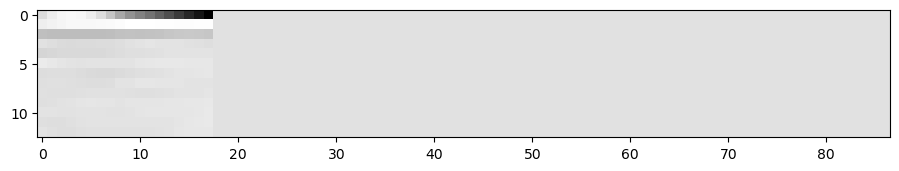

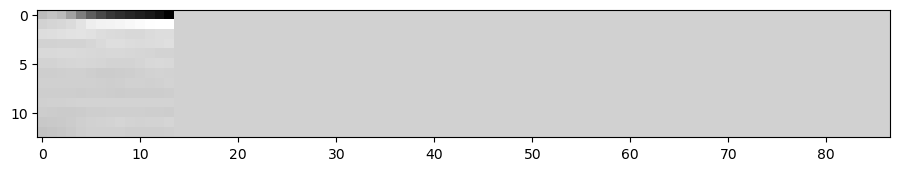

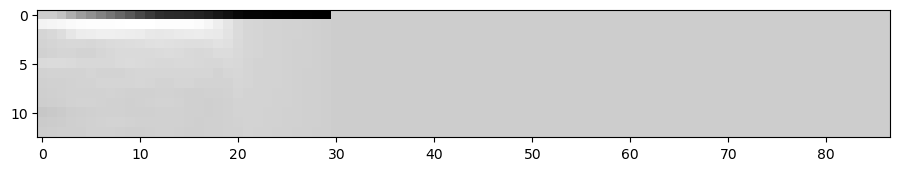

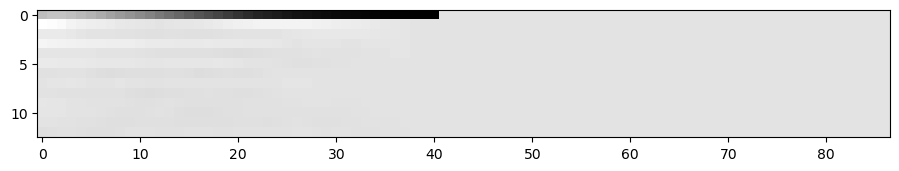

In [ ]:
claps = pd.read_csv('./data\\clap\\data.csv', header=None).to_numpy()
hi_hats = pd.read_csv('./data\\hi-hat\\data.csv', header=None).to_numpy()
kicks = pd.read_csv('./data\\kick\\data.csv', header=None).to_numpy()
snares = pd.read_csv('./data\\snare\\data.csv', header=None).to_numpy()

sounds = [claps, hi_hats, kicks, snares]

for sound in sounds:
    # get random sample
    rand_i = np.random.randint(0, sound.shape[0])
    rand_sound_og = sound[rand_i]
    # reshape from (1, 1131) to (87, 13)
    rand_sound = rand_sound_og.reshape((-1, 13))
    
    # plot
    plt.figure(figsize=(10, 5))
    librosa.display.specshow(rand_sound,
                             x_axis="time"
                             )
    plt.colorbar(format="%+2f")
    plt.show()